In [26]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [11]:
# Sentiment140 CSV on Kaggle has no headers, so define them manually
cols = ['sentiment', 'id', 'date', 'query', 'user', 'text']
df = pd.read_csv("C:/Users/punit/OneDrive/Desktop/ACM-30Days/Sentiment140.csv", encoding='latin-1', names=cols)

print("Dataset shape:", df.shape)
print(df['sentiment'].value_counts())

Dataset shape: (1600000, 6)
sentiment
0    800000
4    800000
Name: count, dtype: int64


In [13]:
def clean_tweet(text):
    text = re.sub(r'http\S+', '', text)                     # Remove URLs
    text = re.sub(r'@\w+', '', text)                        # Remove mentions
    text = re.sub(r'#', '', text)                           # Remove hashtag symbol
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)              # Remove special chars & emojis
    return text.lower().strip()

df['cleaned'] = df['text'].astype(str).apply(clean_tweet)
df = df[df['cleaned'] != '']  # drop empty tweets
print("After cleaning:", df.shape)

After cleaning: (1596443, 7)


In [14]:
mapping = {0: 'negative', 2: 'neutral', 4: 'positive'}
df['sentiment_label'] = df['sentiment'].map(mapping)
df['sentiment_enc'] = df['sentiment_label'].map({'negative':0, 'neutral':1, 'positive':2})

print(df['sentiment_label'].value_counts())

sentiment_label
negative    798346
positive    798097
Name: count, dtype: int64


In [17]:
X = df['cleaned']
y = df['sentiment_enc']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])

Train size: 1277154 Test size: 319289


In [19]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

print("TF-IDF Shape - Train:", X_train_tfidf.shape)

TF-IDF Shape - Train: (1277154, 5000)


Classification Report:
               precision    recall  f1-score   support

         neg       0.78      0.74      0.76    159669
         pos       0.75      0.79      0.77    159620

    accuracy                           0.77    319289
   macro avg       0.77      0.77      0.77    319289
weighted avg       0.77      0.77      0.77    319289



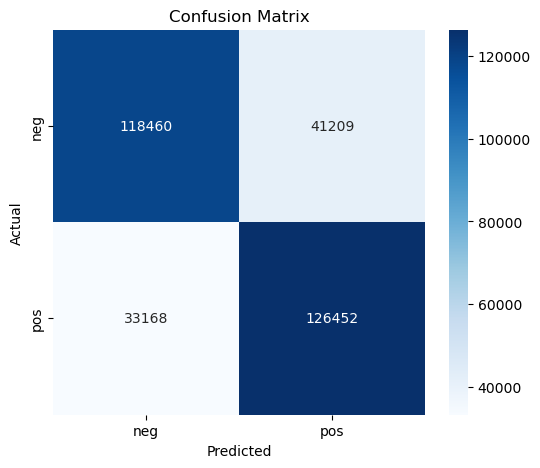

In [28]:
labels = unique_labels(y_test, y_pred)

# Map integers back to class names
label_map = {0: 'neg', 1: 'neu', 2: 'pos'}
target_names = [label_map[l] for l in labels]

# Print report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred, labels=labels, target_names=target_names))

cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [30]:
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

***Short Write-Up:***

**Model Chosen:** Logistic Regression  
**Why:** Efficient, interpretable, and works well on TF‑IDF text features with class imbalance.

**How TF‑IDF helped:**  
It converts tweets into weighted vectors reflecting term importance, which improves classification accuracy.

**Challenges & Resolutions:**  
- Initial encoding error solved by using `encoding='latin-1'` with proper column names :contentReference[oaicite:2]{index=2}.  
- Cleaning emojis, URLs, hashtags took tuning of regex.  
- Handled class imbalance by using stratified split and `class_weight='balanced'` in model.
